In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

17.4393168776936 85.57897116321948
-66.39114941156407 -107.31823157335903
-16.100450529984116 -72.1619636111364
22.471054550062902 63.375217244108285
61.0158847812848 -158.55323921991533
53.11231364495532 -126.06690525874848
68.1482464470669 179.83889815452272
-26.055360800506662 -48.436393978907375
48.05916298364056 97.43155753555527
-8.475014361948993 -13.360779043697306
55.05623685377091 -25.351990673863867
51.85491301272131 65.6269919249388
72.47137633960006 146.1483869446099
10.846763178194877 -21.159306488427717
-28.565761373983186 56.737271965121465
-9.949163338092461 -107.31119109902275
-25.608159335452484 113.38470300678483
88.72819479964531 -76.81749275719238
4.505992132056761 -33.01404093245776
-16.657027217073008 176.63278161462267
-60.4793483548456 -151.14673066681019
39.197783725744046 129.13038961206814
-40.65263266783805 93.0235465823356
14.24284927144727 -61.41028141629434
31.33211005359408 100.98943903323004
53.24695883503128 -146.96333323385795
23.63151584008385 -14.

In [5]:
# 6.1.5
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
#6.2.6

In [8]:
# Import requests library & API Key
import requests
from config import weather_api_key

In [9]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the url

# starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(30)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") + "&units=imperial"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palasa
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | lluta
Processing Record 4 of Set 1 | pasni
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | burns lake
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | guaratuba
Processing Record 9 of Set 1 | kungurtug
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | grindavik
Processing Record 12 of Set 1 | esil
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | praia
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | jardim
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | seoul
Processing Record 23 of Set 1 | busselton
P

Processing Record 42 of Set 4 | bluff
Processing Record 43 of Set 4 | victoriaville
Processing Record 44 of Set 4 | port elizabeth
Processing Record 45 of Set 4 | bealanana
Processing Record 46 of Set 4 | baie-comeau
Processing Record 47 of Set 4 | jinchang
Processing Record 48 of Set 4 | dukat
Processing Record 49 of Set 4 | wattegama
Processing Record 50 of Set 4 | binzhou
Processing Record 1 of Set 5 | naze
Processing Record 2 of Set 5 | raudeberg
Processing Record 3 of Set 5 | carberry
Processing Record 4 of Set 5 | lysyye gory
Processing Record 5 of Set 5 | iqaluit
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | zyryanskoye
Processing Record 8 of Set 5 | bonthe
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | sao filipe
Processing Record 11 of Set 5 | karaul
City not found. Skipping...
Processing Record 12 of Set 5 | longyearbyen
Processing Record 13 of Set 5 | lubbock
Processing Record 14 of Set 5 | mys shmidta
City not found. Skipp

Processing Record 31 of Set 8 | gillette
Processing Record 32 of Set 8 | lindi
Processing Record 33 of Set 8 | luau
Processing Record 34 of Set 8 | nzega
Processing Record 35 of Set 8 | weligama
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 38 of Set 8 | gazanjyk
Processing Record 39 of Set 8 | yulara
Processing Record 40 of Set 8 | upington
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | port-gentil
Processing Record 44 of Set 8 | wuxi
Processing Record 45 of Set 8 | olafsvik
Processing Record 46 of Set 8 | dzaoudzi
Processing Record 47 of Set 8 | krasnotorka
Processing Record 48 of Set 8 | erzin
Processing Record 49 of Set 8 | mandan
Processing Record 50 of Set 8 | vao
Processing Record 1 of Set 9 | panaba
Processing Record 2 of Set 9 | cauquenes
Processing Record 3 of Set 9 | saleaula
City not found. Skipping...
Processing Record 4 of Se

City not found. Skipping...
Processing Record 18 of Set 12 | broken hill
Processing Record 19 of Set 12 | babanusah
City not found. Skipping...
Processing Record 20 of Set 12 | ciucea
Processing Record 21 of Set 12 | chulman
Processing Record 22 of Set 12 | pangai
Processing Record 23 of Set 12 | klaksvik
Processing Record 24 of Set 12 | pedernales
Processing Record 25 of Set 12 | walvis bay
Processing Record 26 of Set 12 | bima
Processing Record 27 of Set 12 | mana
Processing Record 28 of Set 12 | quatre cocos
Processing Record 29 of Set 12 | hai duong
Processing Record 30 of Set 12 | seymchan
Processing Record 31 of Set 12 | south charleston
Processing Record 32 of Set 12 | saint-augustin
Processing Record 33 of Set 12 | inhambane
Processing Record 34 of Set 12 | yeppoon
Processing Record 35 of Set 12 | narsaq
Processing Record 36 of Set 12 | dickinson
Processing Record 37 of Set 12 | coari
Processing Record 38 of Set 12 | kurchum
Processing Record 39 of Set 12 | kawalu
Processing Re

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palasa,18.7667,84.4167,73.29,62,9,4.92,IN,2022-10-21 21:45:14
1,Punta Arenas,-53.1500,-70.9167,51.91,40,0,41.43,CL,2022-10-21 21:45:15
2,Lluta,-16.0147,-72.0142,52.25,33,5,7.27,PE,2022-10-21 21:45:03
3,Pasni,25.2631,63.4710,77.16,83,0,5.82,PK,2022-10-21 21:44:32
4,Bethel,41.3712,-73.4140,61.65,48,0,3.33,US,2022-10-21 21:45:16
5,Burns Lake,54.2331,-125.7533,45.82,43,37,6.11,CA,2022-10-21 21:45:05
6,Leningradskiy,69.3833,178.4167,28.08,98,99,3.74,RU,2022-10-21 21:45:18
7,Guaratuba,-25.8828,-48.5747,76.95,93,3,2.06,BR,2022-10-21 21:45:18
8,Kungurtug,50.5994,97.5228,28.18,83,40,2.28,RU,2022-10-21 21:45:19
9,Georgetown,5.4112,100.3354,78.89,93,40,13.80,MY,2022-10-21 21:44:50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#6.3.1

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

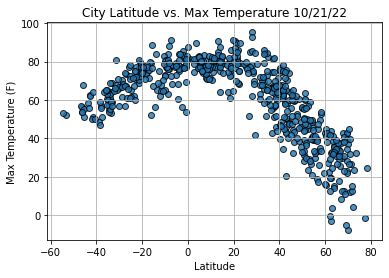

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

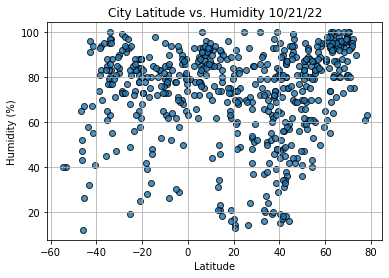

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

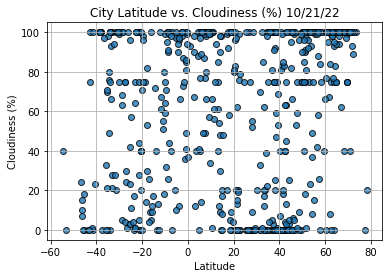

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

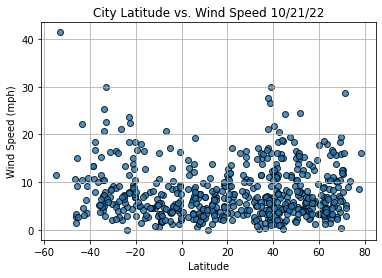

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
#6.4.2

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Praia
Lat                       14.9215
Lng                      -23.5087
Max Temp                    79.34
Humidity                       78
Cloudiness                     20
Wind Speed                   6.91
Country                        CV
Date          2022-10-21 21:42:52
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568     True
Name: Lat, Length: 569, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Palasa,18.7667,84.4167,73.29,62,9,4.92,IN,2022-10-21 21:45:14
3,Pasni,25.2631,63.4710,77.16,83,0,5.82,PK,2022-10-21 21:44:32
4,Bethel,41.3712,-73.4140,61.65,48,0,3.33,US,2022-10-21 21:45:16
5,Burns Lake,54.2331,-125.7533,45.82,43,37,6.11,CA,2022-10-21 21:45:05
6,Leningradskiy,69.3833,178.4167,28.08,98,99,3.74,RU,2022-10-21 21:45:18


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

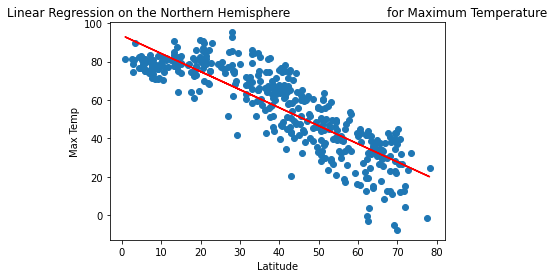

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,260))

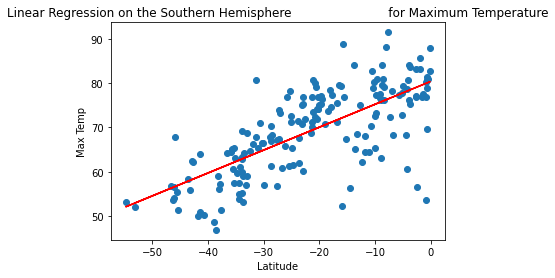

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,280))

In [29]:
#6.4.3

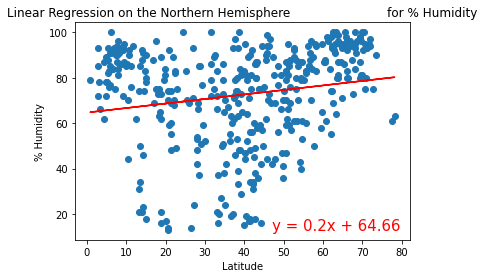

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(47,13))

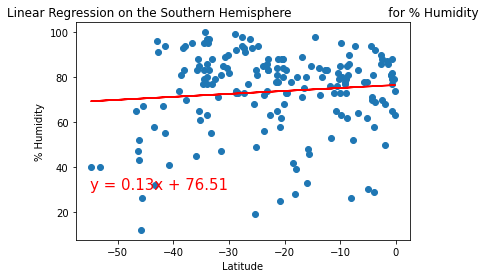

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,30))

In [32]:
#6.4.4

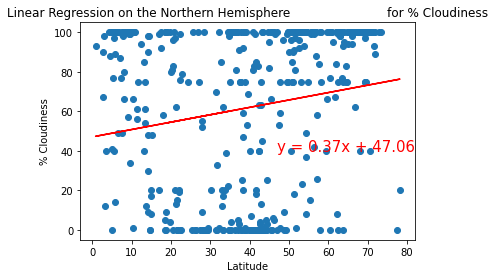

In [33]:
#skill drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(47,40))

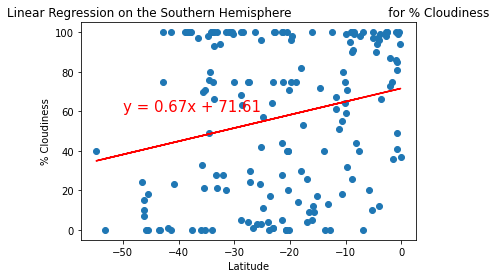

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [35]:
#6.4.5

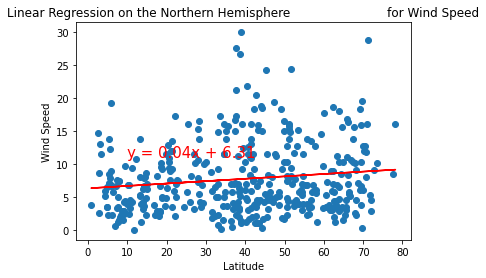

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,11))

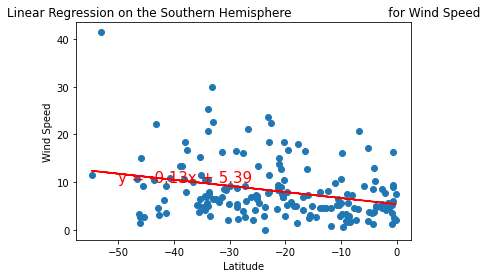

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,10))